In [1]:
print("Random Forest")

Random Forest


In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,cohen_kappa_score,matthews_corrcoef


In [169]:
print("Random Forest Algo....")



data=pd.read_csv("E:\\jupyter\\dataset\\MinScale\\minscaleTrain.csv")
data=data.sample(frac=1)
print(data)
x=data.drop(columns=['Label'])
y=data['Label']

x_train=pd.read_csv("E:\\jupyter\\dataset\\rf_Model\\x.train.csv")
x_test=pd.read_csv("E:\\jupyter\\dataset\\rf_Model\\x.test.csv")
y_train=pd.read_csv("E:\\jupyter\\dataset\\rf_Model\\y.train.csv")
y_test=pd.read_csv("E:\\jupyter\\dataset\\rf_Model\\y.test.csv")

rf=RandomForestClassifier(criterion='gini',n_estimators=80)
start_time_training=time.time()
rf.fit(x_train,y_train["Label"].values.ravel())
execution_time_training=time.time()-start_time_training

start_time_prediction=time.time()
prediction=rf.predict(x_test)
execution_time_prediction=time.time()-start_time_prediction


m=classification_report(y_test["Label"].values.ravel(),prediction,digits=6)
print(m)
cohen_kappa=cohen_kappa_score(y_test["Label"].values.ravel(),prediction)
matthew_corr=matthews_corrcoef(y_test["Label"].values.ravel(),prediction)

print("Confusion Matrics\n")
cm = confusion_matrix(y_test["Label"].values.ravel(), prediction)
print(cm)
far=cm[1,0]/(cm[1,0]+cm[1,1])

print("\nKappa Score")
print(cohen_kappa)
print("Matthew_correlation")
print(matthew_corr)
print("False Rate Alarm (FAR):",far)
print("Execution Time Training:",(execution_time_training/len(x_train))*10**6,"MicroSeconds")
print("Execution Time prediction:",(execution_time_prediction/len(y_train))*10**6,"MicroSeconds")

Random Forest Algo....
       Unnamed: 0     dpkts   doctets     input    output   srcport   dstport  \
3051        24142  0.005955  0.003288  0.000030  0.000000  0.007263  0.914885   
13602       41608  0.000611  0.000056  0.073908  0.073908  0.001312  0.629198   
22281       17626  0.000000  0.000004  0.000000  0.000030  0.800256  0.000508   
32305       33730  0.000611  0.000062  0.073908  0.073908  0.570609  0.006904   
38678        8318  0.000000  0.000004  0.000000  0.000030  0.712876  0.000508   
...           ...       ...       ...       ...       ...       ...       ...   
56901       11264  0.000000  0.000007  0.000030  0.000000  0.000869  0.827162   
6038        27907  0.000000  0.000003  0.000000  0.000030  0.918751  0.000508   
36230       50343  0.000611  0.000059  0.073908  0.073908  0.587888  0.000951   
32074       34736  0.000611  0.000057  0.073908  0.073908  0.001312  0.888842   
37500       12899  0.000000  0.000030  0.000030  0.000000  0.000869  0.978352   

    

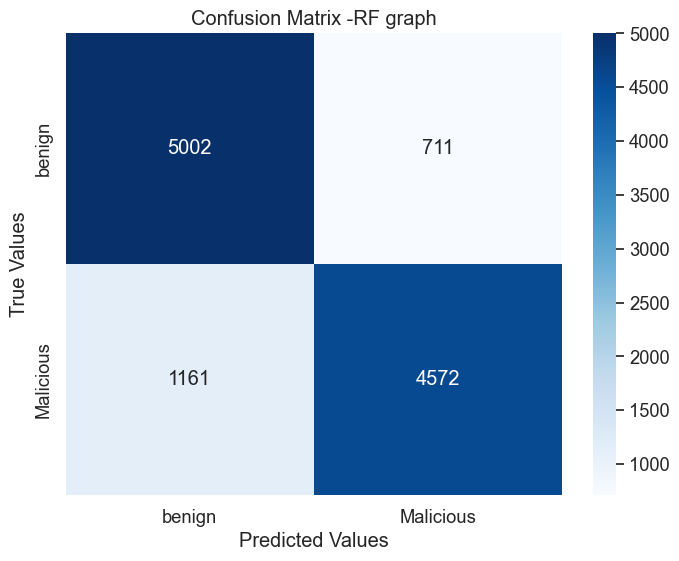

In [139]:
labels=np.unique(y_test["Label"].values.ravel())
l_map={label:"benign" if label==0 else "Malicious" for label in labels}
l_map=[l_map[i] for i in labels]
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm,annot=True,fmt="g",cmap="Blues",xticklabels=l_map,yticklabels=l_map)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix -RF graph")
plt.show()

In [170]:
print("Implementation of KNN algo....\n")


data=pd.read_csv("E:\\jupyter\\dataset\\MinScale\\minscaleTrain.csv")
data=data.sample(frac=1)
print(data)
x=data.drop(columns=['Label'])
y=data['Label']


x_train=pd.read_csv("E:\\jupyter\\dataset\\knn\\x_train.csv")
x_test=pd.read_csv("E:\\jupyter\\dataset\\knn\\x_test.csv")
y_train=pd.read_csv("E:\jupyter\dataset\knn\y_train.csv")
y_test=pd.read_csv("E:\jupyter\dataset\knn\y_test.csv")


knn=KNeighborsClassifier(n_neighbors=1,p=2,algorithm="ball_tree")
start_time_training=time.time()
knn.fit(x_train,y_train["Label"].values.ravel())
execution_time=time.time()-start_time_training

start_time_prediction=time.time()
prediction=knn.predict(x_test)
execution_time_prediction=time.time()-start_time_prediction
m=classification_report(y_test["Label"].values.ravel(),prediction,digits=6)
print(m)

print("Confusion Matrix\n")
cm = confusion_matrix(y_test["Label"].values.ravel(), prediction)
print(cm)
far=cm[1,0]/(cm[1,0]+cm[1,1])
print("False Rate Alarm (FAR):",far)

cohen_kappa=cohen_kappa_score(y_test["Label"].values.ravel(),prediction)
matthew_corr=matthews_corrcoef(y_test["Label"].values.ravel(),prediction)


print("\nKappa Score")
print(cohen_kappa)
print("Matthew_correlation")
print(matthew_corr)
print("Execution Time Training:",(execution_time_training/len(x_train))*10**6,"MicroSeconds")
print("Execution Time prediction:",(execution_time_prediction/len(y_train))*10**6,"MicroSeconds")




Implementation of KNN algo....

       Unnamed: 0     dpkts   doctets     input    output   srcport   dstport  \
55902       57014  0.000611  0.000094  0.073908  0.073908  0.805043  0.006904   
43173        7683  0.000000  0.000025  0.000030  0.000000  0.000869  0.834246   
44512       10007  0.000000  0.000002  0.000000  0.000030  0.573806  0.000508   
29110       31979  0.000611  0.000059  0.073908  0.073908  0.881701  0.000951   
35860       27299  0.000000  0.000008  0.000030  0.000000  0.000869  0.973186   
...           ...       ...       ...       ...       ...       ...       ...   
48679       44094  0.000611  0.000070  0.073908  0.073908  0.001312  0.972120   
23354        3910  0.003359  0.000790  0.000030  0.000000  0.007263  0.919936   
27820        4886  0.003359  0.000839  0.000030  0.000000  0.007263  0.774862   
13831       38904  0.000611  0.000057  0.073908  0.073908  0.001312  0.634414   
34757        3005  0.000916  0.000050  0.000030  0.000000  0.007263  0.657341

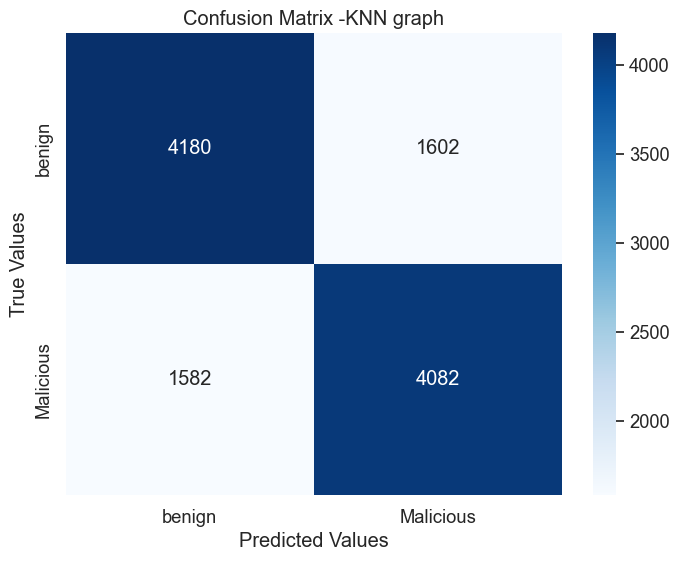

In [142]:
labels=np.unique(y_test["Label"].values.ravel())
l_map={label:"benign" if label==0 else "Malicious" for label in labels}
l_map=[l_map[i] for i in labels]
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm,annot=True,fmt="g",cmap="Blues",xticklabels=l_map,yticklabels=l_map)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix -KNN graph")
plt.show()

In [336]:
print("Linear Support Vector Classification\n")

data=pd.read_csv("E:\\jupyter\\dataset\\MinScale\\robustscaleTrain.csv")
data=data.sample(frac=1)
print(data)
x=data.drop(columns=['Label'])
y=data['Label']

x_train=pd.read_csv("E:\\jupyter\\dataset\\LSVC\\x_train.csv")
x_test=pd.read_csv("E:\\jupyter\\dataset\\LSVC\\x_test.csv")
y_train=pd.read_csv("E:\\jupyter\\dataset\\LSVC\\y_train.csv")
y_test=pd.read_csv("E:\\jupyter\\dataset\\LSVC\\y_test.csv")

lsvc=LinearSVC(dual=True,max_iter=1200,fit_intercept=True)
start_time_training=time.time()
lsvc.fit(x_train,y_train["Label"].values.ravel())
execution_time_training=time.time()-start_time_training

start_time_prediction=time.time()
prediction=lsvc.predict(x_test)
execution_time_prediction=time.time()-start_time_prediction
m=classification_report(y_test["Label"].values.ravel(),prediction,digits=6
                       ,zero_division=1)
print(m)

print("Confusion Matrix\n")
cm = confusion_matrix(y_test["Label"].values.ravel(), prediction)
print(cm)
far=cm[1,0]/(cm[1,0]+cm[1,1])
print("False Rate Alarm (FAR):",far)

cohen_kappa=cohen_kappa_score(y_test["Label"].values.ravel(),prediction)
matthew_corr=matthews_corrcoef(y_test["Label"].values.ravel(),prediction)


print("\nKappa Score")
print(cohen_kappa)
print("Matthew_correlation")
print(matthew_corr)
print("Execution Time Training:",(execution_time_training/len(x_train))*10**6,"MicroSeconds")
print("Execution Time Prediction:",(execution_time_prediction/len(y_train))*10**6,"MicroSeconds")


Linear Support Vector Classification

       Unnamed: 0  dpkts    doctets     input    output   srcport   dstport  \
5875        11264   -4.0  -0.763768  0.000000 -0.000413 -0.693130  1.055984   
57178       22185   -4.0  -0.734783  0.000000 -0.000413 -0.693130  0.799145   
4350        48474    0.0   0.486957  0.999587  1.000000  0.150017 -0.010735   
29001       18409   31.0  60.489855  0.000000 -0.000413 -0.684876  0.794380   
27062       50798    0.0  -0.104348  0.999587  1.000000 -0.692558  0.765880   
...           ...    ...        ...       ...       ...       ...       ...   
46429       33315    0.0  -0.014493  0.999587  1.000000  0.024255 -0.003049   
11743       53087    0.0   1.221739  0.999587  1.000000  0.362724 -0.010735   
38016       21505   29.0   8.555072 -0.000413  0.000000  0.593210 -0.003049   
56460       17070   38.0   7.418841 -0.000413  0.000000  0.152303 -0.003049   
8233         9366   50.0  76.540580  0.000000 -0.000413 -0.684876  1.020475   

       prot  

c:\users\ar.raakul aravind\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


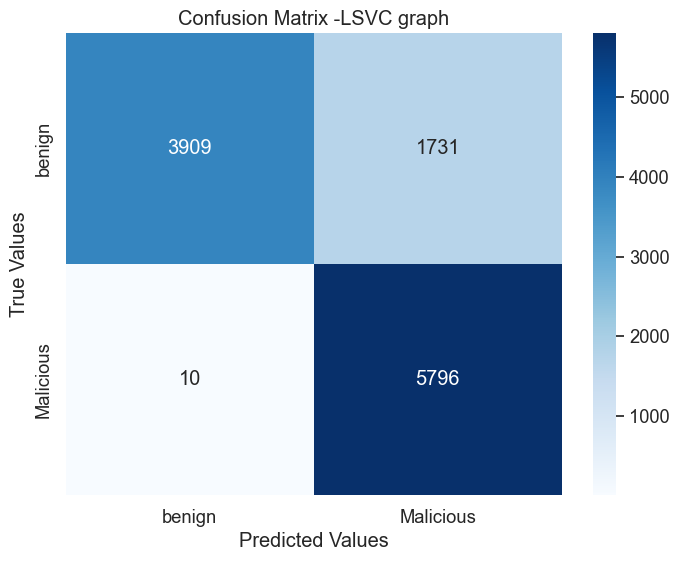

In [118]:
labels=np.unique(y_test["Label"].values.ravel())
l_map={label:"benign" if label==0 else "Malicious" for label in labels}
l_map=[l_map[i] for i in labels]
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm,annot=True,fmt="g",cmap="Blues",xticklabels=l_map,yticklabels=l_map)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix -LSVC graph")
plt.show()


In [185]:
print("Voting Classifier Algo...\n")


data=pd.read_csv("E:\\jupyter\\dataset\\MinScale\\robustScaleTrain.csv")
data=data.sample(frac=1)
print(data)
x=data.drop(columns=['Label'])
y=data['Label']


x_train=pd.read_csv("E:\\jupyter\\dataset\\VC\\x_train.csv")
x_test=pd.read_csv("E:\\jupyter\\dataset\\VC\\x_test.csv")
y_train=pd.read_csv("E:\\jupyter\\dataset\\VC\\y_train.csv")
y_test=pd.read_csv("E:\\jupyter\\dataset\\VC\\y_test.csv")

robust=VotingClassifier(estimators=[("Logistic_Regression_Classifier",LogisticRegression(dual=False)),("KNeighbors_Classifier",KNeighborsClassifier(n_neighbors=5)),("SGD_Classifier",SGDClassifier()),("LinearSVC",LinearSVC(dual=False)),("Random_Forest_Classifier",RandomForestClassifier(n_estimators=100))],voting="hard")
start_time_training=time.time()
robust.fit(x_train,y_train["Label"].values.ravel())
execution_time_training=time.time()-start_time_training

start_time_prediction=time.time()
prediction=robust.predict(x_test)
execution_time_prediction=time.time()-start_time_prediction

m=classification_report(y_test["Label"].values.ravel(),prediction,digits=6,zero_division=1)
print(m)

print("Confusion Matrix\n")
cm = confusion_matrix(y_test["Label"].values.ravel(), prediction)
print(cm)
far=cm[1,0]/(cm[1,0]+cm[1,1])
print("False Rate Alarm (FAR):",far)

cohen_kappa=cohen_kappa_score(y_test["Label"].values.ravel(),prediction)
matthew_corr=matthews_corrcoef(y_test["Label"].values.ravel(),prediction)

print("\nKappa Score")
print(cohen_kappa)
print("Matthew_correlation")
print(matthew_corr)
print("Execution Time Training:",(execution_time_training/len(x_train))*10**6,"MicroSeconds")
print("Execution Time Prediction:",(execution_time_prediction/len(y_train))*10**6,"MicroSeconds")

Voting Classifier Algo...

       Unnamed: 0  dpkts   doctets     input    output   srcport   dstport  \
20163       34367    0.0  0.104348  0.999587  1.000000 -0.692558  1.119781   
14514       51228    0.0  0.453623  0.999587  1.000000  0.283779 -0.010735   
19192        9163   -4.0 -0.820290 -0.000413  0.000000  0.127921 -0.011307   
16863       14614   -4.0 -0.840580 -0.000413  0.000000  0.457988 -0.011307   
19181       30820    0.0  0.091304  0.999587  1.000000 -0.684876  0.862010   
...           ...    ...       ...       ...       ...       ...       ...   
23047       49048    0.0  0.088406  0.999587  1.000000 -0.684876  0.991086   
21879       50788    0.0  0.000000  0.999587  1.000000  0.084194 -0.010735   
22201        9403   10.0  7.050725  0.000000 -0.000413 -0.684876  0.811616   
8335         6108   -3.0 -0.668116 -0.000413  0.000000  0.437817 -0.003049   
22036       21028    9.0  8.010145  0.000000 -0.000413 -0.684876  0.969488   

       prot  tos  tcp_flags  Label  

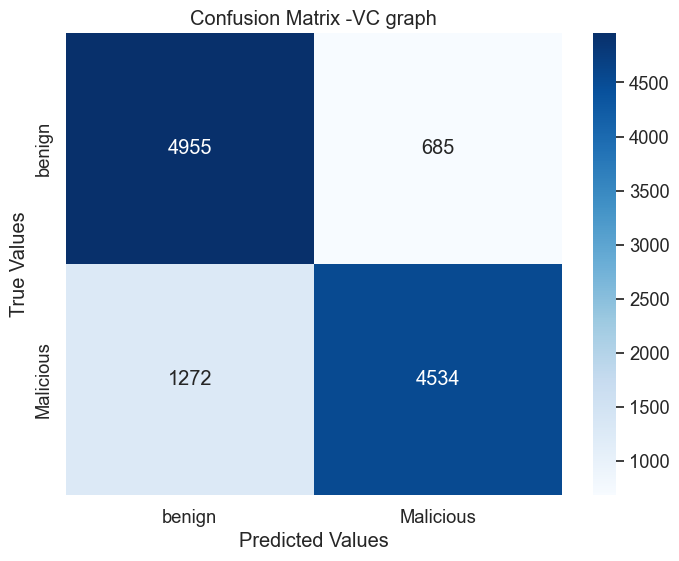

In [121]:
labels=np.unique(y_test["Label"].values.ravel())
l_map={label:"benign" if label==0 else "Malicious" for label in labels}
l_map=[l_map[i] for i in labels]
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm,annot=True,fmt="g",cmap="Blues",xticklabels=l_map,yticklabels=l_map)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix -VC graph")
plt.show()

In [186]:
print("Logistic Regression Classifier....")
data=pd.read_csv("E:\\jupyter\\dataset\\MinScale\\robustscaleTrain.csv")
data=data.sample(frac=1)
print(data)
x=data.drop(columns=['Label'])
y=data['Label']

x_train=pd.read_csv("E:\\jupyter\\dataset\\LR\\x_train.csv")
x_test=pd.read_csv("E:\\jupyter\\dataset\\LR\\x_test.csv")
y_train=pd.read_csv("E:\\jupyter\\dataset\\LR\\y_train.csv")
y_test=pd.read_csv("E:\\jupyter\\dataset\\LR\\y_test.csv")

lr=LogisticRegression(dual=False,max_iter=150,intercept_scaling=1.0)
start_time_training=time.time()
lr.fit(x_train,y_train["Label"].values.ravel())
execution_time_training=time.time()-start_time_training

start_time_prediction=time.time()
prediction=lr.predict(x_test)
execution_time_prediction=time.time()-start_time_prediction
m=classification_report(y_test["Label"].values.ravel(),prediction,digits=6,zero_division=1)
print(m)
cm=confusion_matrix(y_test["Label"].values.ravel(),prediction)
print(cm)

far=cm[1,0]/(cm[1,0]+cm[1,1])
print("False Rate Alarm (FAR):",far)

cohen_kappa=cohen_kappa_score(y_test["Label"].values.ravel(),prediction)
matthew_corr=matthews_corrcoef(y_test["Label"].values.ravel(),prediction)

print("\nKappa Score")
print(cohen_kappa)
print("Matthew_correlation")
print(matthew_corr)
print("Execution Time Training:",(execution_time_training/len(x_train))*10**6,"MicroSeconds")
print("Execution Time Prediction:",(execution_time_prediction/len(y_train))*10**6,"MicroSeconds")

Logistic Regression Classifier....
       Unnamed: 0  dpkts   doctets     input    output   srcport   dstport  \
925          6099    1.0  0.323188 -0.000413  0.000000  0.514731 -0.003049   
30407       13996    2.0 -0.107246 -0.000413  0.000000  0.202337 -0.003049   
37891       56233    0.0  1.530435  0.999587  1.000000  0.498349 -0.010735   
40987       47168    0.0 -0.137681  0.999587  1.000000 -0.684876  0.903214   
13067        6227   -4.0 -0.313043  0.000000 -0.000413 -0.693130  1.269819   
...           ...    ...       ...       ...       ...       ...       ...   
38470        5822   26.0  7.526087  0.000000 -0.000413 -0.692558  0.970971   
17832       29619    0.0 -0.075362  0.999587  1.000000 -0.684876  1.191518   
51598       37498    0.0  0.101449  0.999587  1.000000 -0.684876  0.783455   
9604        38898   -3.0 -0.760870  0.999587  1.000000 -0.692558  0.716037   
54920       52892    0.0  1.220290  0.999587  1.000000  0.355063 -0.010735   

       prot  tos  tcp_flags 

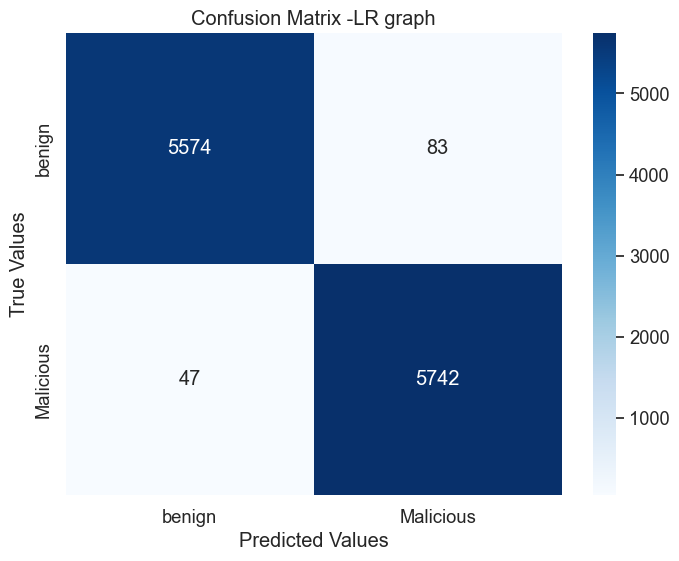

In [123]:
labels=np.unique(y_test["Label"].values.ravel())
l_map={label:"benign" if label==0 else "Malicious" for label in labels}
l_map=[l_map[i] for i in labels]
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm,annot=True,fmt="g",cmap="Blues",xticklabels=l_map,yticklabels=l_map)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix -LR graph")
plt.show()

In [187]:
print("Perceptron+SGD....")

data=pd.read_csv("E:\\jupyter\\dataset\\MinScale\\robustscaleTrain.csv")
data=data.sample(frac=1)
print(data)
x=data.drop(columns=['Label'])
y=data['Label']

x_train=pd.read_csv("E:\\jupyter\\dataset\\perceptron+SGD\\x_train.csv")
x_test=pd.read_csv("E:\\jupyter\\dataset\\perceptron+SGD\\x_test.csv")
y_train=pd.read_csv("E:\\jupyter\\dataset\\perceptron+SGD\\y_train.csv")
y_test=pd.read_csv("E:\\jupyter\\dataset\\perceptron+SGD\\y_test.csv")

Perceptron+SGD....
       Unnamed: 0  dpkts     doctets     input    output   srcport   dstport  \
33077        2483    7.0    6.544928  0.000000 -0.000413 -0.684876  0.713962   
35625       51653    0.0    1.534783  0.999587  1.000000  0.302108 -0.010735   
30297       56091    0.0    0.252174  0.999587  1.000000 -0.692558  0.994601   
7961         8584   23.0    3.786957 -0.000413  0.000000  0.585887 -0.003049   
14011       57113    0.0    0.162319  0.999587  1.000000 -0.684876  1.035593   
...           ...    ...         ...       ...       ...       ...       ...   
55013       15804   71.0  156.631884  0.000000 -0.000413 -0.684876  1.255293   
33536       27317   -4.0   -0.831884 -0.000413  0.000000  0.375741 -0.011307   
9980        29255    0.0   -0.091304  0.999587  1.000000 -0.684876  1.175637   
39185       26846   -4.0   -0.821739 -0.000413  0.000000  0.553717 -0.011307   
35905         101   -4.0   -0.817391  0.000000 -0.000413 -0.693130  1.192979   

       prot  tos  tc

In [188]:
sgd=SGDClassifier(loss="perceptron",n_iter_no_change=9,penalty=None,
                  learning_rate="optimal",early_stopping=False,max_iter=1400,shuffle=True)
start_time_training=time.time()
sgd.fit(x_train,y_train["Label"].values.ravel())
execution_time_training=time.time()-start_time_training

start_time_prediction=time.time()
prediction=sgd.predict(x_test)
execution_time_prediction=time.time()-start_time_prediction
m=classification_report(y_test["Label"].values.ravel(),prediction,digits=6,zero_division=1)
print(m)
cm=confusion_matrix(y_test["Label"].values.ravel(),prediction)
print(cm)
far=cm[1,0]/(cm[1,0]+cm[1,1])
print("False Rate Alarm (FAR):",far)

cohen_kappa=cohen_kappa_score(y_test["Label"].values.ravel(),prediction)
matthew_corr=matthews_corrcoef(y_test["Label"].values.ravel(),prediction)

accuracies.append(accuracy_score(y_test["Label"].values.ravel(),prediction))
algo.append("Perceptron+SGD Algo")
recall.append(recall_score(y_test["Label"].values.ravel(),prediction))
f1.append(f1_score(y_test["Label"].values.ravel(),prediction))


print("\nKappa Score")
print(cohen_kappa)
print("Matthew_correlation")
print(matthew_corr)
print("Execution Time Training:",(execution_time_training/len(x_train))*10**6,"MicroSeconds")
print("Execution Time Prediction:",(execution_time_prediction/len(x_train))*10**6,"MicroSeconds")

              precision    recall  f1-score   support

           0   0.999386  0.856142  0.922235      5707
           1   0.874790  0.999477  0.932986      5739

    accuracy                       0.928010     11446
   macro avg   0.937088  0.927809  0.927611     11446
weighted avg   0.936914  0.928010  0.927626     11446

[[4886  821]
 [   3 5736]]
False Rate Alarm (FAR): 0.0005227391531625719

Kappa Score
0.8559608862536666
Matthew_correlation
0.8648479845597653
Execution Time Training: 89.23868425493954 MicroSeconds
Execution Time Prediction: 0.06804743186597902 MicroSeconds


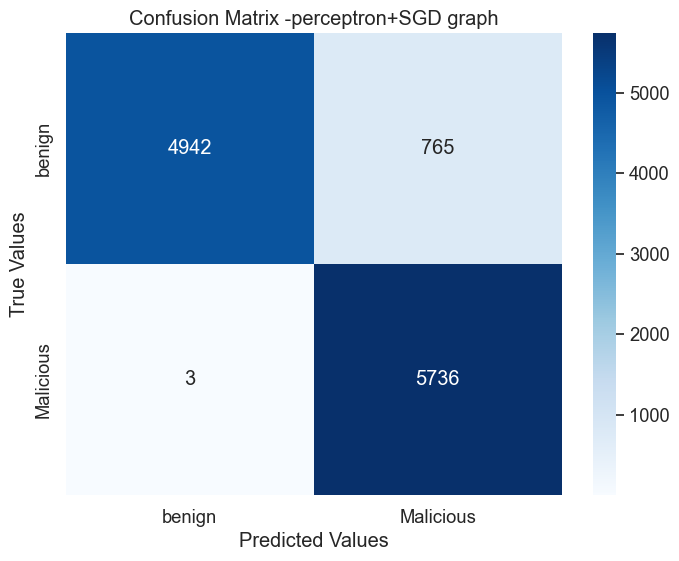

In [130]:
labels=np.unique(y_test["Label"].values.ravel())
l_map={label:"benign" if label==0 else "Malicious" for label in labels}
l_map=[l_map[i] for i in labels]
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm,annot=True,fmt="g",cmap="Blues",xticklabels=l_map,yticklabels=l_map)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix -perceptron+SGD graph")
plt.show()